In [1]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz
!tar xf spark-3.4.1-bin-hadoop3.tgz
!pip install -q findspark


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,131 kB]
Get:14 http:

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.1-bin-hadoop3"

In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [7]:
df = spark.createDataFrame(df)
df.show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|
|  -114.57|   33.57|              20.0|     1454.0|         326.0|     624.0|     262.0|        1.925|           65500.0|
|  -114.58|   33.63|    

In [8]:
import matplotlib.pyplot as plt
from pyspark.sql import functions as f
import seaborn as sns

In [9]:
df.describe().show()

+-------+-------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+
|summary|          longitude|          latitude|housing_median_age|       total_rooms|   total_bedrooms|        population|       households|     median_income|median_house_value|
+-------+-------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+
|  count|              17000|             17000|             17000|             17000|            17000|             17000|            17000|             17000|             17000|
|   mean|-119.56210823529466|35.625224705882296| 28.58935294117647| 2643.664411764706|539.4108235294118|1429.5739411764705|501.2219411764706|3.8835780999999843|207300.91235294117|
| stddev|  2.005166408426082| 2.137339794657047|12.586936981660388|2179.9470714527715|421.4994515798

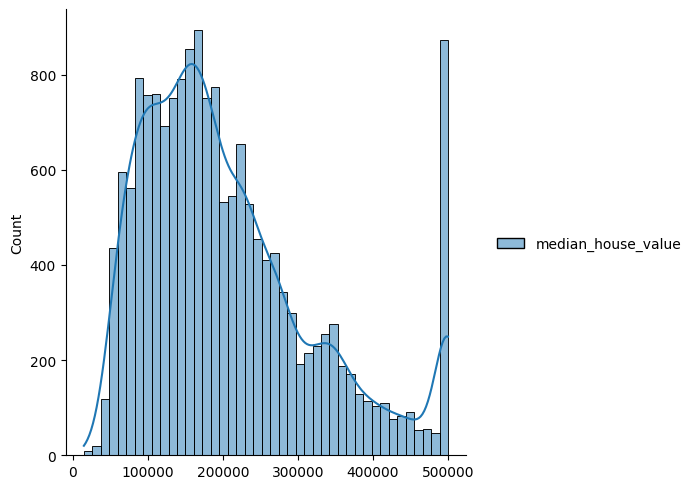

In [10]:
sns.displot(df.select('median_house_value').toPandas(),kde=True)

In [11]:
df = df.filter(df.median_house_value<500000)


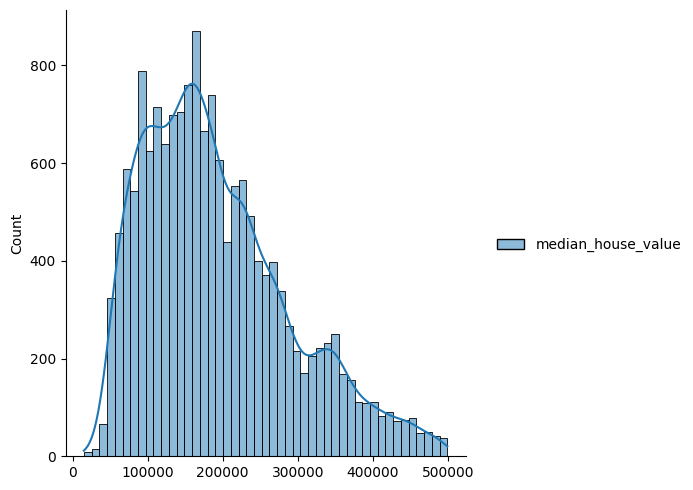

In [12]:
sns.displot(df.select('median_house_value').toPandas(),kde=True)

<Axes: ylabel='median_house_value'>

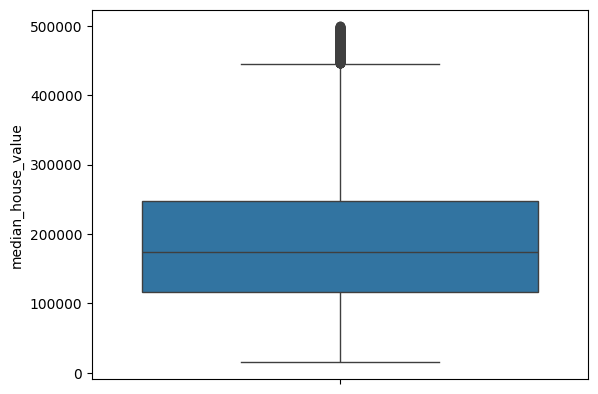

In [13]:
sns.boxplot(y='median_house_value',data=df.toPandas())

In [14]:
df = df.filter(df.median_house_value<420000)

<Axes: ylabel='median_house_value'>

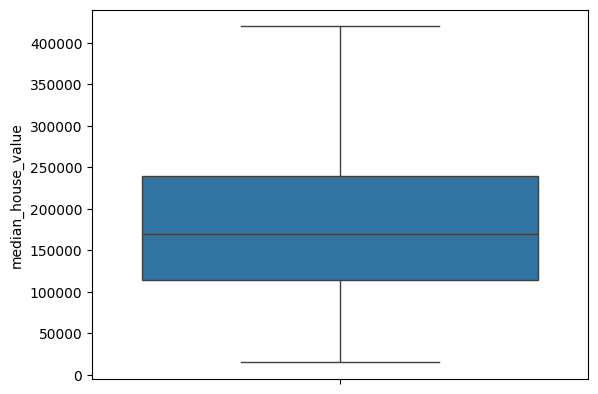

In [15]:
sns.boxplot(y='median_house_value',data=df.toPandas())

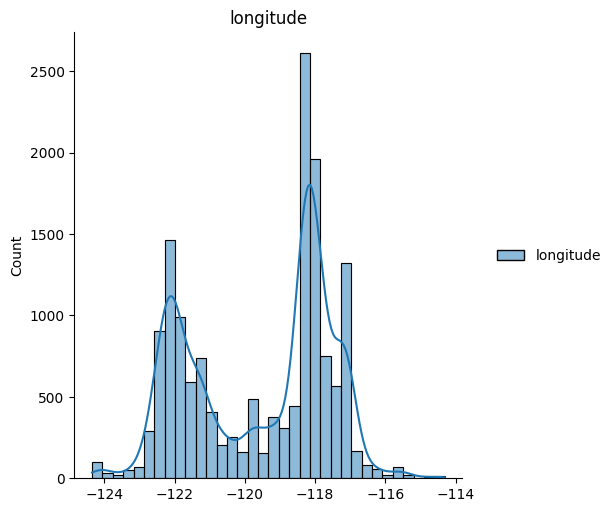

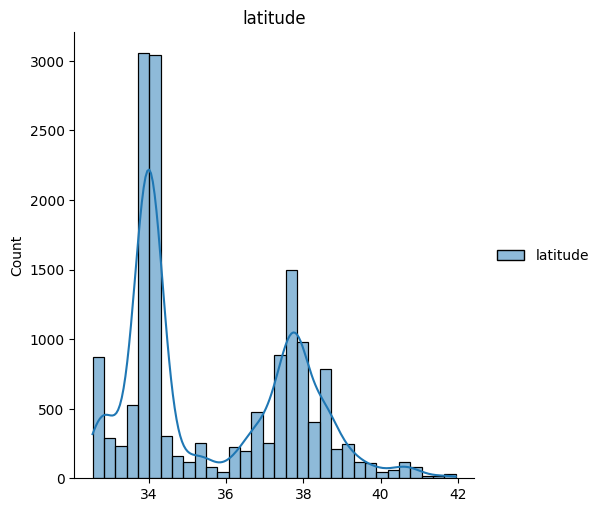

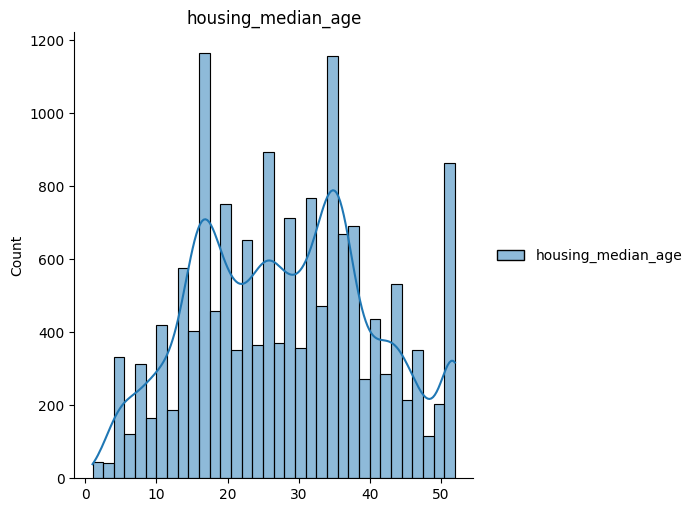

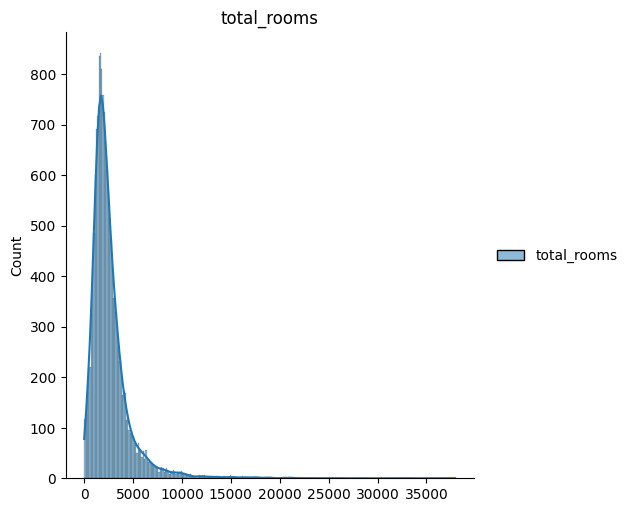

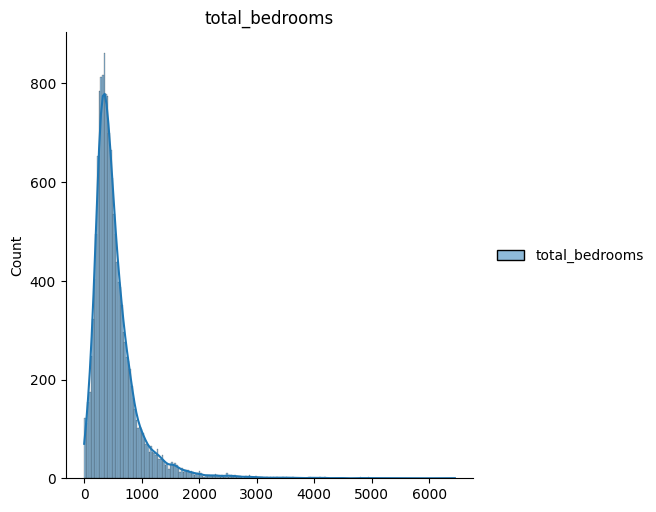

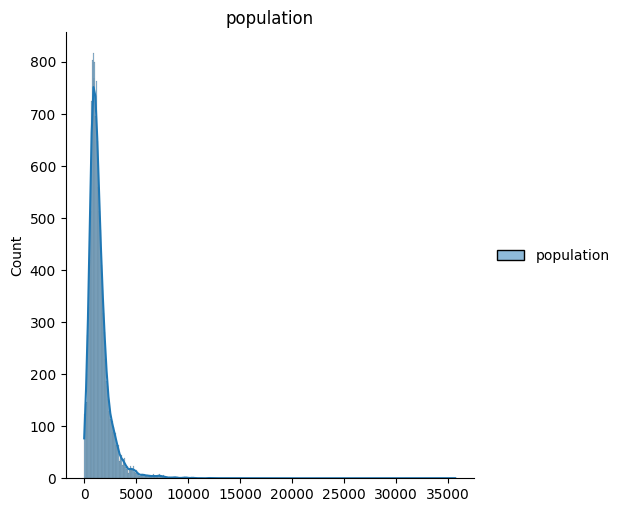

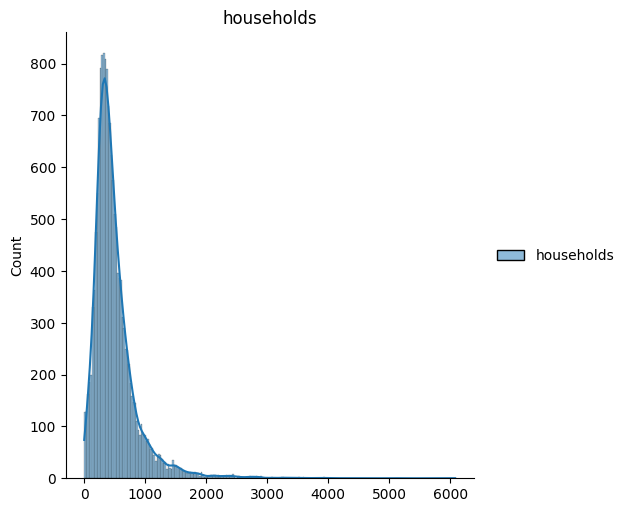

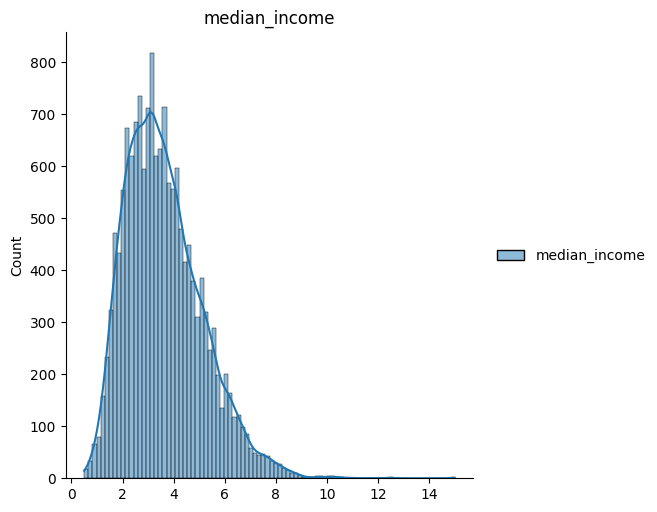

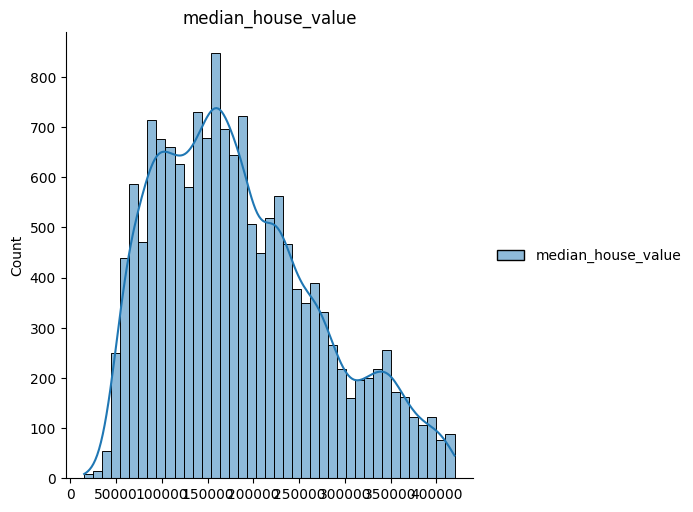

In [16]:
for i in df.columns:
  sns.displot(df.select(i).toPandas(),kde=True)
  plt.title(i)
  plt.show()

In [17]:
from pyspark.ml.feature import VectorAssembler

In [18]:
columns = df.columns
columns.remove('median_house_value')
columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [19]:
assembler = VectorAssembler(inputCols=columns,outputCol='features')
df = assembler.transform(df)
df.show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+--------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|            features|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+--------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|[-114.31,34.19,15...|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|[-114.47,34.4,19....|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|[-114.56,33.69,17...|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|[-114.57,33.64,14...|

In [21]:
from pyspark.ml.feature import StandardScaler

In [22]:
sc = StandardScaler(inputCol='features',outputCol='scaled')
df = sc.fit(df).transform(df)
df.show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+--------------------+--------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|            features|              scaled|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+--------------------+--------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|[-114.31,34.19,15...|[-56.961655952861...|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|[-114.47,34.4,19....|[-57.041385328703...|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|[-114.56,33.69,17...|[-57.086233102614...|
|  -114.57|   33

In [23]:
train_data, test_data = df.randomSplit([0.7,0.3],seed=42)

In [24]:
from pyspark.ml.regression import LinearRegression

In [25]:
lr = LinearRegression(labelCol='median_house_value',featuresCol='scaled')
lr = lr.fit(train_data)

In [26]:
pred = lr.transform(test_data)

In [27]:
from pyspark.ml.evaluation import RegressionEvaluator

In [28]:
evaluator = RegressionEvaluator(labelCol='median_house_value',predictionCol='prediction',metricName='rmse')

In [29]:
evaluator.evaluate(pred)

55560.725104773206

In [30]:
from pyspark.ml.regression import DecisionTreeRegressor, RandomForestRegressor, GBTRegressor

In [31]:
dt = DecisionTreeRegressor(labelCol='median_house_value',featuresCol='scaled')
dt = dt.fit(train_data)
pred = dt.transform(test_data)
evaluator.evaluate(pred)

57665.63502722323

In [32]:
rf = RandomForestRegressor(labelCol='median_house_value',featuresCol='scaled')
rf = rf.fit(train_data)
pred = rf.transform(test_data)
evaluator.evaluate(pred)

58342.658967496034

In [33]:
gb = GBTRegressor(labelCol='median_house_value',featuresCol='scaled')
gb = gb.fit(train_data)
pred = gb.transform(test_data)
evaluator.evaluate(pred)

46430.992056354575

In [34]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator


In [35]:
gbt = GBTRegressor(labelCol='median_house_value',featuresCol='scaled')


paramGrid = ParamGridBuilder() \
    .addGrid(gbt.maxDepth, [5, 10]) \
    .addGrid(gbt.maxIter, [10, 20]) \
    .addGrid(gbt.stepSize, [0.1, 0.01]) \
    .build()

In [36]:
crossval = CrossValidator(estimator=gbt,
                          estimatorParamMaps=paramGrid,
                          evaluator=RegressionEvaluator(labelCol="median_house_value", predictionCol="prediction", metricName="rmse"),
                          numFolds=5)
cv_model = crossval.fit(train_data)
best_model = cv_model.bestModel

In [37]:
predictions = best_model.transform(test_data)


In [38]:
evaluator = RegressionEvaluator(labelCol="median_house_value", predictionCol="prediction", metricName="rmse")
best_rmse = evaluator.evaluate(predictions)
print(f"Best GBTRegressor RMSE: {best_rmse}")

Best GBTRegressor RMSE: 46430.992056354575


In [39]:
cv_model.getEstimatorParamMaps()

[{Param(parent='GBTRegressor_813f819f6630', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes. Must be in range [0, 30].'): 5,
  Param(parent='GBTRegressor_813f819f6630', name='maxIter', doc='max number of iterations (>= 0).'): 10,
  Param(parent='GBTRegressor_813f819f6630', name='stepSize', doc='Step size (a.k.a. learning rate) in interval (0, 1] for shrinking the contribution of each estimator.'): 0.1},
 {Param(parent='GBTRegressor_813f819f6630', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes. Must be in range [0, 30].'): 5,
  Param(parent='GBTRegressor_813f819f6630', name='maxIter', doc='max number of iterations (>= 0).'): 10,
  Param(parent='GBTRegressor_813f819f6630', name='stepSize', doc='Step size (a.k.a. learning rate) in interval (0, 1] for shrinking the contribution of each estimator.'): 0.01},
 {Param(paren